In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [15]:
df = train_df.copy()

In [21]:
df.fillna({'Age': df['Age'].median()}, inplace=True)

In [25]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



In [27]:
df.drop(columns=['Cabin'], inplace=True)

In [29]:
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [51]:
df = test_df.copy()

In [53]:
print(test_df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [55]:
# Safe assignments without inplace=True
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Convert columns to category
test_df['Sex'] = test_df['Sex'].astype('category')
test_df['Embarked'] = test_df['Embarked'].astype('category')
test_df['Pclass'] = test_df['Pclass'].astype('category')


In [37]:
sns.set(style="whitegrid")

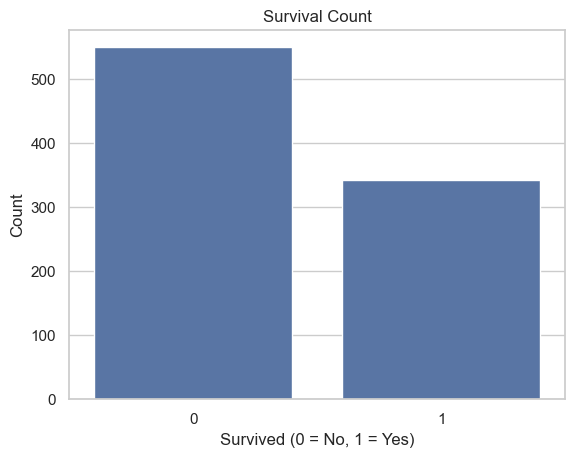

In [39]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

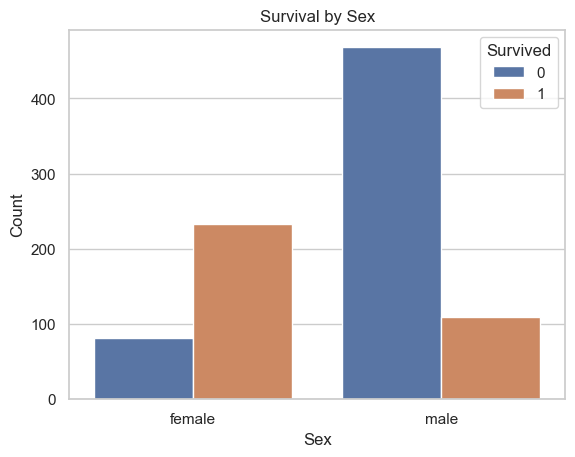

In [41]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.ylabel('Count')
plt.show()

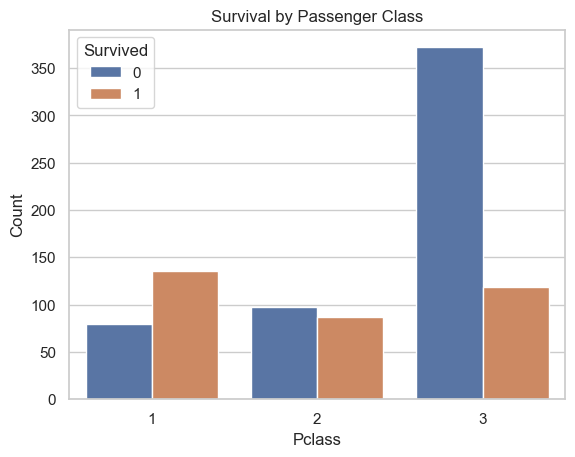

In [43]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.ylabel('Count')
plt.show()

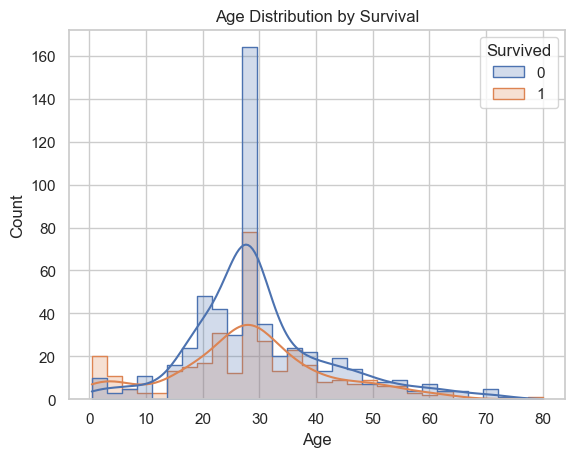

In [45]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element='step')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

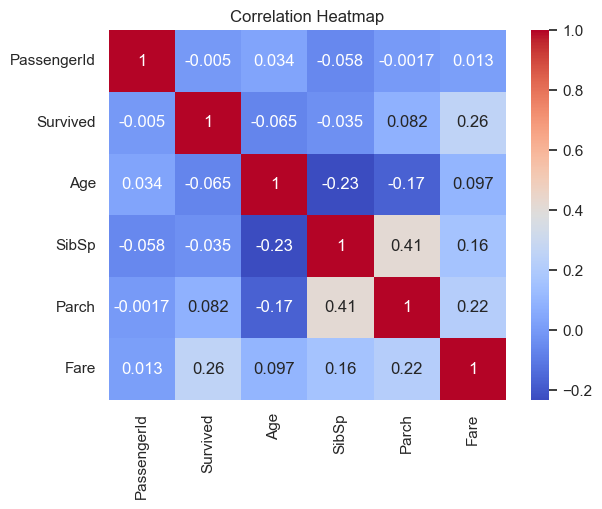

In [47]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 